In [2]:
# Installing TensorFlow
pip install tensorflow-gpu

In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Importing the dataset
from tensorflow.keras.datasets import fashion_mnist

In [6]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [9]:
np.max(x_train), np.min(x_train), np.mean(x_train)

(255, 0, 72.94035223214286)

In [10]:
np.max(y_train), np.min(y_train)

(9, 0)

In [11]:
class_names = ['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


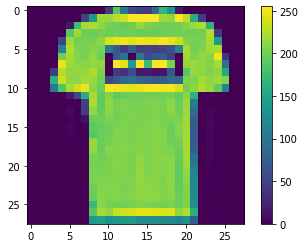

In [12]:
# Data Exploration
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [13]:
y_train[1]

0

In [0]:
# Normalizing the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

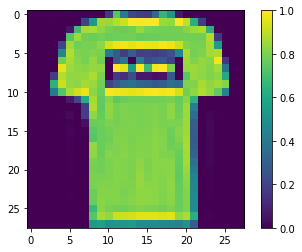

In [15]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [18]:
# Flattening the dataset
print(x_train.shape, x_test.shape)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)
(60000, 784) (10000, 784)


Model

In [0]:
# Define an object
model = tf.keras.models.Sequential()
# sequence of layers  

In [0]:
# Adding first fully connected hidden layer
# 1) units (No of neurons) = 128
# 2) activation function = ReLU
# 3) input shape = 784
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

In [0]:
# Adding the second layer with dropout
model.add(tf.keras.layers.Dropout(0.3))
# regularization technique, prevents overfitting

In [0]:
  # Adding the output layer
# 1) units = 10
# 2) activation = softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

Training the model

In [0]:
# Compiling the model
# 1) Optimizer = adam, (minimize the loss function)
# 2) loss function = sparse_categorical_crossentropy, (acts as guide to optimizer)
# 3) metrices = sparse_categorical_accuracy

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Training the model
model.fit(x_train,y_train, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3004 - sparse_categorical_accuracy: 0.8887
Epoch 2/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2962 - sparse_categorical_accuracy: 0.8887
Epoch 3/20
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2926 - sparse_categorical_accuracy: 0.8900
Epoch 4/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2846 - sparse_categorical_accuracy: 0.8932
Epoch 5/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2809 - sparse_categorical_accuracy: 0.8955
Epoch 6/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2788 - sparse_categorical_accuracy: 0.8946
Epoch 7/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2741 - sparse_categorical_accuracy: 0.8957
Epoch 8/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2691 - spars

Model evaluation and prediction

In [35]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.3564 - sparse_categorical_accuracy: 0.8810


In [36]:
print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.8809999823570251


In [0]:
# Model prediction
y_pred = model.predict_classes(x_test)

In [38]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [39]:
y_pred[110],  y_test[110] # predicted and actual output

(2, 2)

In [40]:
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [41]:
# Confusion metrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[838   2  26  25   3   0 101   0   5   0]
 [  0 979   0  14   2   0   4   0   1   0]
 [ 16   1 879  10  48   0  46   0   0   0]
 [ 15   7  15 899  33   0  25   0   6   0]
 [  0   2 192  34 720   0  51   0   1   0]
 [  0   0   0   1   0 969   0  15   0  15]
 [124   2 137  29  47   0 655   0   6   0]
 [  0   0   0   0   0  18   0 938   0  44]
 [  6   2   6   3   2   3  12   3 963   0]
 [  0   0   0   0   0   4   1  25   0 970]]


In [42]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.881
